#### Importaciones

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from ucimlrepo import fetch_ucirepo
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import random
from sklearn.ensemble import RandomForestClassifier

#### Lectura del data set

In [3]:
# fetch dataset 
adult = fetch_ucirepo(id=2)  

In [4]:
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  


#### Investigamos un poco los datos

In [5]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [6]:
y.columns

Index(['income'], dtype='object')

In [7]:
X.shape

(48842, 14)

In [8]:
X.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [10]:
X.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

- Uni X e y para verificar si hay duplicados y eliminarlos.

In [11]:
df_completo = pd.concat([X,y], axis=1)
df_completo.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
df_completo.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [13]:
df_completo.duplicated().sum()

np.int64(29)

- Vemos que hay duplicados, por lo tanto los eliminaremos

In [14]:
df_completo = df_completo.drop_duplicates()

In [15]:
df_completo.shape

(48813, 15)

> Duplicados eliminados

- Ahora analizaremos los null

In [16]:

df_completo[["workclass", "occupation"]].isnull().sum()

workclass     963
occupation    966
dtype: int64

In [17]:
df_procesado = df_completo.fillna({
    'workclass': 'Unknown',
    'occupation': 'Unknown',
    'native-country': 'Unknown'  
})

In [18]:
df_procesado.isnull().sum().sum()

np.int64(0)

------

#### ELECCION DE LA RECOMENDACION

##### - He tomado la decision de que mi sistema recomiende trayectorias profesionales o educativas para aumentar la probabilidad de tener ingresos mayores a 50k

------

#### GRAFICOS

<function matplotlib.pyplot.show(close=None, block=None)>

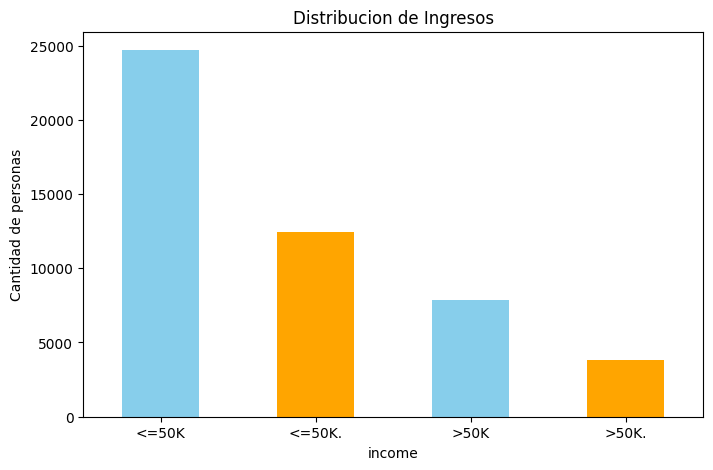

In [19]:
plt.figure(figsize=(8, 5))

income_counts = df_procesado["income"].value_counts()
income_counts.plot(kind="bar", color=["skyblue", "orange"])
plt.title("Distribucion de Ingresos")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=0)
plt.show

- Analisis sobre los ingresos y la cantidad de personas

------

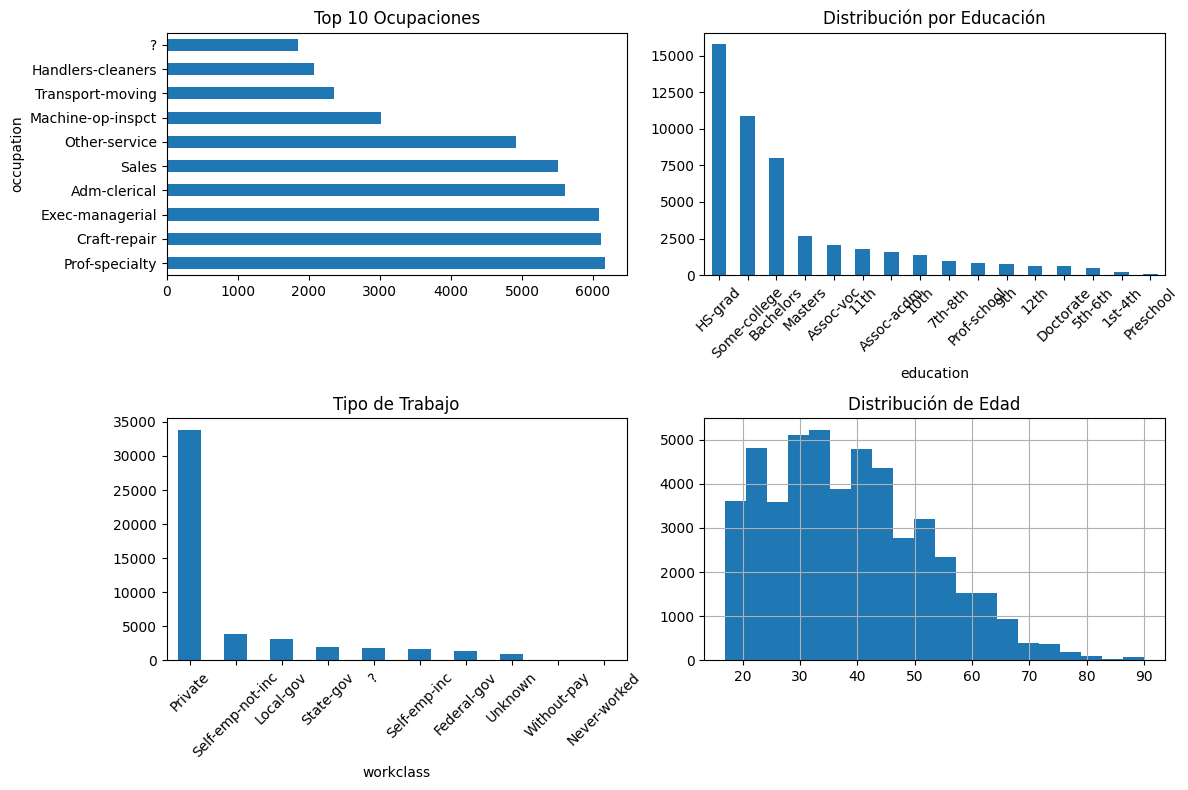

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Ocupaciones más comunes (top 10)
top_occupations = df_procesado['occupation'].value_counts().head(10)
top_occupations.plot(kind='barh', ax=axes[0,0])
axes[0,0].set_title('Top 10 Ocupaciones')

# Niveles educativos
education_counts = df_procesado['education'].value_counts()
education_counts.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Distribución por Educación')
axes[0,1].tick_params(axis='x', rotation=45)

# Workclass
workclass_counts = df_procesado['workclass'].value_counts()
workclass_counts.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Tipo de Trabajo')
axes[1,0].tick_params(axis='x', rotation=45)

# Distribución de edad
df_procesado['age'].hist(bins=20, ax=axes[1,1])
axes[1,1].set_title('Distribución de Edad')

plt.tight_layout()
plt.show()

- Analisis sobre los tipos de trabajo, educacion y la edad.

-----

<Figure size 1200x600 with 0 Axes>

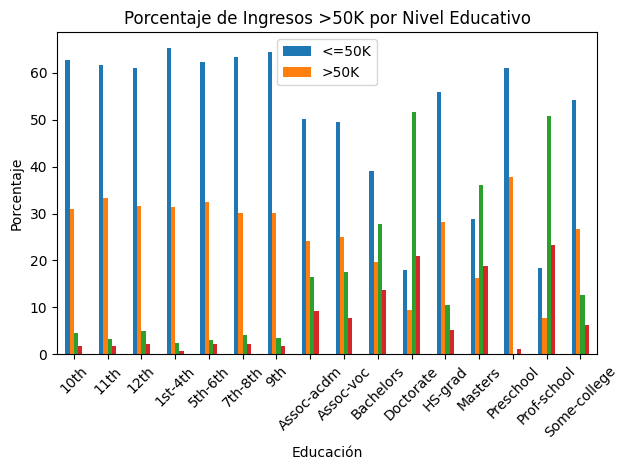

In [21]:
education_income = pd.crosstab(df_procesado['education'], df_procesado['income'], normalize='index') * 100

plt.figure(figsize=(12, 6))
education_income.plot(kind='bar', stacked=False)
plt.title('Porcentaje de Ingresos >50K por Nivel Educativo')
plt.ylabel('Porcentaje')
plt.xlabel('Educación')
plt.xticks(rotation=45)
plt.legend(['<=50K', '>50K'])
plt.tight_layout()
plt.show()

- Porcentaje de ingresos por nivel educativo, muy importante para el estudio

------

#### CODIFICACION

##### - Comenzare el codificado de las variables categoricas de una manera hibrida, para preservar el orden logico de algunas variables. Haciendo un ordinal encoder para education

In [22]:
education_order = {
    'Preschool': 1, '1st-4th': 2, '5th-6th': 3, '7th-8th': 4, '9th': 5,
    '10th': 6, '11th': 7, '12th': 8, 'HS-grad': 9, 'Some-college': 10,
    'Assoc-voc': 11, 'Assoc-acdm': 12, 'Bachelors': 13, 'Masters': 14,
    'Prof-school': 15, 'Doctorate': 16
}

variables_nominales = ['workclass', 'occupation', 'marital-status', 'relationship', 'race', 'sex']
variables_ordinales = ['education']

df_encoded = df_procesado.copy()
df_encoded['education_encoded'] = df_encoded['education'].map(education_order)

In [23]:
variables_importantes = ['workclass', 'occupation', 'sex', 'marital-status']

for var in variables_importantes:
    
    dummies = pd.get_dummies(df_encoded[var], prefix=var)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)

df_encoded.shape

(48813, 51)

In [24]:
df_procesado["native-country"].value_counts()

native-country
United-States                 43810
Mexico                          947
?                               582
Philippines                     295
Unknown                         274
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Vietnam                          86
Guatemala                        86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua    

- He tomado la decision de eliminar "race" y "native_country" porque considero que un sistema de recomendacion se debe enfocar en lo que las personas podemos cambiar, dejandolas mi modelo podria encasillar a las personas por origen, limitar recomendaciones basandose en esteriotipos y perpetuar desigualdades. 

In [25]:
variables_eliminar = ['race', 'native-country']
df_encoded = df_encoded.drop(columns=variables_eliminar)



In [26]:
variables_eliminar_add = [
    'fnlwgt',        # Peso estadístico
    'capital-gain',  # Mayoría son 0
    'capital-loss',  # Mayoría son 0  
    'relationship'   # Correlacionado con marital-status
]

df_encoded = df_encoded.drop(columns=variables_eliminar_add)


In [27]:
variables_categoricas = ['occupation', 'workclass', 'marital-status', 'sex']

le = LabelEncoder()
for var in variables_categoricas:
    df_encoded[f'{var}_encoded'] = le.fit_transform(df_encoded[var])
    

In [28]:
df_encoded.shape

(48813, 49)

In [29]:
df_encoded.head()

,age,workclass,education,education-num,marital-status,occupation,sex,hours-per-week,income,education_encoded,...,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_encoded,workclass_encoded,marital-status_encoded,sex_encoded
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Male,40,<=50K,13,...,False,False,False,True,False,False,1,7,4,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,13,<=50K,13,...,False,True,False,False,False,False,4,6,2,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Male,40,<=50K,9,...,False,False,False,False,False,False,6,4,0,1
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Male,40,<=50K,7,...,False,True,False,False,False,False,6,4,2,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,40,<=50K,13,...,False,True,False,False,False,False,10,4,2,0


------

In [30]:
columnas_categoricas_originales = []
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object' and col != 'income':  # Mantenemos income como objetivo
        columnas_categoricas_originales.append(col)

print(f"Columnas categóricas a eliminar: {columnas_categoricas_originales}")

df_final = df_encoded.drop(columns=columnas_categoricas_originales)

Columnas categóricas a eliminar: ['workclass', 'education', 'marital-status', 'occupation', 'sex']


In [31]:
df_final = df_final.drop("education_encoded", axis=1)

In [32]:
df_final.dtypes

age                                      int64
education-num                            int64
hours-per-week                           int64
income                                  object
workclass_?                               bool
workclass_Federal-gov                     bool
workclass_Local-gov                       bool
workclass_Never-worked                    bool
workclass_Private                         bool
workclass_Self-emp-inc                    bool
workclass_Self-emp-not-inc                bool
workclass_State-gov                       bool
workclass_Unknown                         bool
workclass_Without-pay                     bool
occupation_?                              bool
occupation_Adm-clerical                   bool
occupation_Armed-Forces                   bool
occupation_Craft-repair                   bool
occupation_Exec-managerial                bool
occupation_Farming-fishing                bool
occupation_Handlers-cleaners              bool
occupation_Ma

In [33]:
df_final

,age,education-num,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_encoded,workclass_encoded,marital-status_encoded,sex_encoded
0,39,13,40,<=50K,False,False,False,False,False,False,...,False,False,False,True,False,False,1,7,4,1
1,50,13,13,<=50K,False,False,False,False,False,False,...,False,True,False,False,False,False,4,6,2,1
2,38,9,40,<=50K,False,False,False,False,True,False,...,False,False,False,False,False,False,6,4,0,1
3,53,7,40,<=50K,False,False,False,False,True,False,...,False,True,False,False,False,False,6,4,2,1
4,28,13,40,<=50K,False,False,False,False,True,False,...,False,True,False,False,False,False,10,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,13,36,<=50K.,False,False,False,False,True,False,...,False,False,False,False,False,False,10,4,0,0
48838,64,9,40,<=50K.,False,False,False,False,False,False,...,False,False,False,False,False,True,15,8,6,1
48839,38,13,50,<=50K.,False,False,False,False,True,False,...,False,True,False,False,False,False,10,4,2,1
48840,44,13,40,<=50K.,False,False,False,False,True,False,...,False,False,False,False,False,False,1,4,0,1


-------

#### NORMALIZACION

In [34]:
variables_numericas = []
for col in df_final.columns:
    if col != "income" and df_final[col].dtype in ["int64", "float64"]:
        variables_numericas.append(col)

variables_numericas

['age',
 'education-num',
 'hours-per-week',
 'occupation_encoded',
 'workclass_encoded',
 'marital-status_encoded',
 'sex_encoded']

In [35]:
df_normalizado = df_final.copy()

scaler = StandardScaler()
df_normalizado[variables_numericas] = scaler.fit_transform(df_final[variables_numericas])

In [36]:
df_normalizado.head()

,age,education-num,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_encoded,workclass_encoded,marital-status_encoded,sex_encoded
0,0.025724,1.136595,-0.034304,<=50K,False,False,False,False,False,False,...,False,False,False,True,False,False,-1.371023,2.019493,0.916303,0.704208
1,0.828125,1.136595,-2.213335,<=50K,False,False,False,False,False,False,...,False,True,False,False,False,False,-0.670896,1.339859,-0.410194,0.704208
2,-0.047221,-0.419685,-0.034304,<=50K,False,False,False,False,True,False,...,False,False,False,False,False,False,-0.204145,-0.019409,-1.736691,0.704208
3,1.046961,-1.197826,-0.034304,<=50K,False,False,False,False,True,False,...,False,True,False,False,False,False,-0.204145,-0.019409,-0.410194,0.704208
4,-0.776676,1.136595,-0.034304,<=50K,False,False,False,False,True,False,...,False,True,False,False,False,False,0.729358,-0.019409,-0.410194,-1.420035


----

- Separe mis datos

In [37]:
X_features = df_normalizado.drop("income", axis=1)
y_target = df_normalizado["income"]

print(f"Features disponibles: {X_features.columns.tolist()}")
print(f"Distribución objetivo: {y_target.value_counts()}")

Features disponibles: ['age', 'education-num', 'hours-per-week', 'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Unknown', 'workclass_Without-pay', 'occupation_?', 'occupation_Adm-clerical', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Priv-house-serv', 'occupation_Prof-specialty', 'occupation_Protective-serv', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'occupation_Unknown', 'sex_Female', 'sex_Male', 'marital-status_Divorced', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupatio

> Seguire un sistema de filtrado basado en contenido

- En este sistema filtrare a personas por sus caracteristicas fijas, que no pueden cambiar, y le recomendare las accionables de personas con caracteristicas fijas similares que ya tienen el income deseado

In [41]:
caracteristicas_fijas = ["age", "sex_encoded", "marital-status_encoded"]

caracteristicas_accionables = []
for col in X_features:
    if col not in caracteristicas_fijas:
        caracteristicas_accionables.append(col)

In [58]:
exitosos = df_normalizado[df_normalizado["income"] == ">50K"]
exitosos.head()

,age,education-num,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_encoded,workclass_encoded,marital-status_encoded,sex_encoded
7,0.974016,-0.419685,0.369221,>50K,False,False,False,False,False,False,...,False,True,False,False,False,False,-0.670896,1.339859,-0.410194,0.704208
8,-0.557840,1.525666,0.772745,>50K,False,False,False,False,True,False,...,False,False,False,True,False,False,0.729358,-0.019409,0.916303,-1.420035
9,0.244561,1.136595,-0.034304,>50K,False,False,False,False,True,False,...,False,True,False,False,False,False,-0.670896,-0.019409,-0.410194,0.704208
10,-0.120167,-0.030615,3.193891,>50K,False,False,False,False,True,False,...,False,True,False,False,False,False,-0.670896,-0.019409,-0.410194,0.704208
11,-0.630785,1.136595,-0.034304,>50K,False,False,False,False,False,False,...,False,True,False,False,False,False,0.729358,2.019493,-0.410194,0.704208


#### Recomendaciones

In [56]:
usuario_ejemplo = 50

edad_original = df_final.iloc[usuario_ejemplo]['age']
educacion_original = df_final.iloc[usuario_ejemplo]['education-num'] 
horas_original = df_final.iloc[usuario_ejemplo]['hours-per-week']


exitosos_similares = df_final[
    (df_final['income'] == '>50K') & 
    (df_final['age'] >= edad_original - 5) & 
    (df_final['age'] <= edad_original + 5)
]

recomendaciones = {
    'edad': edad_original,
    'educacion_actual': educacion_original,
    'educacion_recomendada': exitosos_similares['education-num'].mean(),
    'horas_actual': horas_original,
    'horas_recomendadas': exitosos_similares['hours-per-week'].mean(),
    'usuarios_similares_exitosos': len(exitosos_similares),
    'income_actual': df_final.iloc[usuario_ejemplo]['income']
}

recomendaciones

{'edad': np.int64(25),
 'educacion_actual': np.int64(10),
 'educacion_recomendada': np.float64(11.416176470588235),
 'horas_actual': np.int64(40),
 'horas_recomendadas': np.float64(45.475),
 'usuarios_similares_exitosos': 680,
 'income_actual': '<=50K'}

----

- Haremos una funcion para mas casos

In [62]:
usuarios_random = random.sample(range(len(df_final)), 5)

for i in usuarios_random:
    edad = df_final.iloc[i]["age"]
    exitosos = df_final[
        (df_final["income"] == ">50K") &
        (df_final["age"] >= edad -5) &
        (df_final["age"] <= edad +5)
    ]

    actual = [df_final.iloc[i]["education-num"], df_final.iloc[i]["hours-per-week"]]
    recomendado = [round(exitosos["education-num"].mean(), 1), round(exitosos["hours-per-week"].mean(), 1)]
    print(f"Usuario edad {edad}: Educacion y Horas trabajadas actuales {actual} --> Educacion y horas trabajadas recomendadas{recomendado}")


Usuario edad 25: Educacion y Horas trabajadas actuales [np.int64(13), np.int64(20)] --> Educacion y horas trabajadas recomendadas[np.float64(11.4), np.float64(45.5)]
Usuario edad 43: Educacion y Horas trabajadas actuales [np.int64(12), np.int64(40)] --> Educacion y horas trabajadas recomendadas[np.float64(11.8), np.float64(46.1)]
Usuario edad 40: Educacion y Horas trabajadas actuales [np.int64(14), np.int64(50)] --> Educacion y horas trabajadas recomendadas[np.float64(11.8), np.float64(46.3)]
Usuario edad 57: Educacion y Horas trabajadas actuales [np.int64(10), np.int64(48)] --> Educacion y horas trabajadas recomendadas[np.float64(11.3), np.float64(44.5)]
Usuario edad 63: Educacion y Horas trabajadas actuales [np.int64(13), np.int64(40)] --> Educacion y horas trabajadas recomendadas[np.float64(11.2), np.float64(42.0)]


In [64]:
print(f"Promedio exitosos - Educación: {exitosos['education-num'].mean():.1f}")
print(f"Promedio exitosos - Horas: {exitosos['hours-per-week'].mean():.1f}")

Promedio exitosos - Educación: 11.2
Promedio exitosos - Horas: 42.0


#### Modelado

> Este sistema implementa filtrado basado en contenido, que busca usuarios similares exitosos y recomienda sus características.

--- Razones para no usar modelo predictivo:

- Objetivo diferente: No necesitamos predecir si alguien ganará >50K, sino recomendar qué hacer para lograrlo
- Metodología directa: El sistema encuentra personas similares exitosas y analiza qué hacen - las recomendaciones surgen directamente de estos datos
- Interpretabilidad: "Personas como tú que ganan >50K tienen educación X y trabajan Y horas" - más claro que probabilidades de un modelo
- Simplicidad: Funciona inmediatamente con usuarios nuevos sin reentrenamiento

> Conclusión: Para filtrado basado en contenido, buscar similitudes es más apropiado que modelos predictivos, los cuales serían útiles en filtrado colaborativo.
